In [13]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

import rasterio
from rasterio import plot

%matplotlib inline
import earthpy as et
import earthpy.plot as ep
import copy
import pandas as pd
import xarray as xr

path_to_temp_mean_folder = "./Huglin_Index_Data/CMIP5_Downscaled_GDF_ds01_1-16/cmip5dc_global_10min_rcp2_6_2030s_asc/bcc_csm1_1_m_rcp2_6_2030s_tmean_10min_r1i1p1_no_tile_asc/"
path_to_temp_max_folder = "./Huglin_Index_Data/CMIP5_Downscaled_GDF_ds01_1-16/cmip5dc_global_10min_rcp2_6_2030s_asc/bcc_csm1_1_m_rcp2_6_2030s_tmax_10min_r1i1p1_no_tile_asc/"

hemisphere = "N"

no_data_value = -9999

from osgeo import ogr, osr, gdal
# np.set_printoptions(threshold=sys.maxsize)


In [2]:
north_hem_temp_mean_list = []
north_hem_temp_max_list = []
south_hem_temp_mean_list = []
south_hem_temp_max_list = []
for i in range(4,10):
    north_hem_t_mean_array = (np.loadtxt(path_to_temp_mean_folder + "tmean_" + str(i) + ".asc", skiprows=6)).astype('float64')
    north_hem_t_mean_array[north_hem_t_mean_array != no_data_value] = north_hem_t_mean_array[north_hem_t_mean_array != no_data_value]/10

    north_hem_temp_mean_list.append(north_hem_t_mean_array)
    
    
    
    north_hem_t_max_array = (np.loadtxt(path_to_temp_max_folder + "tmax_" + str(i) + ".asc", skiprows=6)).astype('float64')
    north_hem_t_max_array[north_hem_t_max_array != no_data_value] = north_hem_t_max_array[north_hem_t_max_array != no_data_value]/10
    
    north_hem_temp_max_list.append(north_hem_t_max_array)

for i in range(1,4):
    south_hem_t_mean_array = (np.loadtxt(path_to_temp_mean_folder + "tmean_" + str(i) + ".asc", skiprows=6)).astype('float64')
    south_hem_t_mean_array[south_hem_t_mean_array != no_data_value] = south_hem_t_mean_array[south_hem_t_mean_array != no_data_value]/10

    south_hem_temp_mean_list.append(south_hem_t_mean_array)
    
    
    
    south_hem_t_max_array = (np.loadtxt(path_to_temp_max_folder + "tmax_" + str(i) + ".asc", skiprows=6)).astype('float64')
    south_hem_t_max_array[south_hem_t_max_array != no_data_value] = south_hem_t_max_array[south_hem_t_max_array != no_data_value]/10
    
    south_hem_temp_max_list.append(south_hem_t_max_array)


In [3]:
north_hem_huglin_index_list = []
north_hem_huglin_index = np.zeros(north_hem_temp_mean_list[0].shape, dtype=float)
month = 4
for i in range(len(north_hem_temp_mean_list)):
    if month==4 or month==6 or month==9:
        north_hem_huglin_index_list.append(30*(north_hem_temp_mean_list[i] + north_hem_temp_max_list[i] - 20)/2)
    else:
        north_hem_huglin_index_list.append(31*(north_hem_temp_mean_list[i] + north_hem_temp_max_list[i] - 20)/2)
        
    north_hem_huglin_index = north_hem_huglin_index + north_hem_huglin_index_list[i]
    month += 1
    
    
for i in range(len(north_hem_temp_mean_list)):
    if month==4 or month==6 or month==9:
        north_hem_huglin_index_list.append(30*(north_hem_temp_mean_list[i] + north_hem_temp_max_list[i] - 20)/2)
    else:
        north_hem_huglin_index_list.append(31*(north_hem_temp_mean_list[i] + north_hem_temp_max_list[i] - 20)/2)
        
    north_hem_huglin_index = north_hem_huglin_index + north_hem_huglin_index_list[i]
    month += 1

In [4]:
print(north_hem_huglin_index.shape)
huglin_max_value = np.amax(north_hem_huglin_index)
print(huglin_max_value)
huglin_max_value = np.amax(north_hem_huglin_index[north_hem_huglin_index != np.amax(north_hem_huglin_index)])
print(huglin_max_value)


huglin_min_value = np.amin(north_hem_huglin_index)
print(huglin_min_value)
north_hem_huglin_index[north_hem_huglin_index < no_data_value] = no_data_value
print(north_hem_huglin_index)


huglin_min_value = np.amin(north_hem_huglin_index[north_hem_huglin_index != np.amin(north_hem_huglin_index)])
print(huglin_min_value)


(900, 2160)
11734.1
11700.1
-3663294.0
[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 ...
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]]
-9058.4


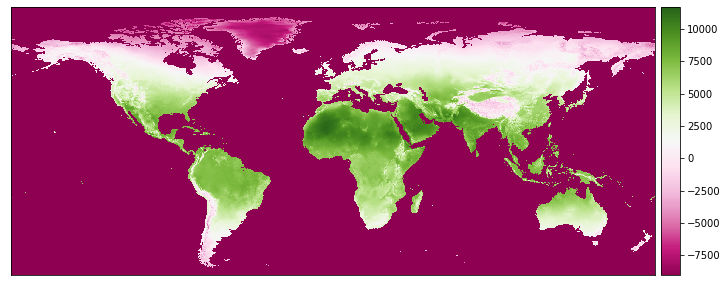

In [5]:
test = ep.plot_bands(north_hem_huglin_index,cmap='PiYG',scale=False, vmin=huglin_min_value,vmax=huglin_max_value)

In [12]:
plt.figure()
plt.show(test)
plt.savefig('books_read.png')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [6]:
x,y = north_hem_huglin_index.shape
lat = np.linspace(-90, 90, x)
lon = np.linspace(-180, 180, y)

lat = np.around(lat, decimals=1)
lon = np.around(lon, decimals=1)

huglin_dataset = xr.DataArray(data=north_hem_huglin_index, dims=["lat", "lon"], coords=[lat,lon])
print(huglin_dataset)

<xarray.DataArray (lat: 900, lon: 2160)>
array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]])
Coordinates:
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.7 -179.5 ... 179.7 179.8 180.0


In [7]:
lat_array_indexes= []
lat0 = 40
for i in range(0,11,2):
    tmp = float(huglin_dataset.sel(lat=lat0 + i,lon=-180,method='nearest').lat.data )
    lat_array_indexes.append(int(np.where(lat==tmp)[0]))


k=[1.02,1.03,1.04,1.05,1.06]    
for i in range(len(lat_array_indexes)-1):
    for j in range(lat_array_indexes[i+1] - lat_array_indexes[i]):
        huglin_dataset[lat_array_indexes[i] + j] = huglin_dataset[lat_array_indexes[i] + j] * k[i]
    


In [114]:
print(huglin_dataset[650][1])

<xarray.DataArray ()>
array(-10198.98)
Coordinates:
    lat      float64 40.1
    lon      float64 -179.8


In [39]:
data = np.array(north_hem_temp_mean_list)
print(data.shape)

(6, 900, 2160)


In [121]:
def CreateGeoTiff(outRaster, data):
    driver = gdal.GetDriverByName('GTiff')
    no_bands, width, height = data.shape
    print(no_bands, width,height)
    DataSet = driver.Create(outRaster, height, width, no_bands, gdal.GDT_Float64)
    DataSet.SetGeoTransform([-180,0.1666666666667,0,-60,0,0.1666666666667])
    
#     print(DataSet.GetRasterBand(0))

    for i, image in enumerate(data, 1):
        print(i)
        DataSet.GetRasterBand(i).WriteArray(image)
    DataSet = None

In [128]:
CreateGeoTiff("./geotiff.tiff",data )

6 900 2160
1
2
3
4
5
6


In [123]:
test = rasterio.open('./geotiff.tiff')

/home/chris/.local/lib/python3.6/site-packages/rasterio/__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [124]:
print(test.shape)

(900, 2160)


In [125]:
ds=gdal.Open('geotiff.tiff')  
print (ds.RasterCount, ds.RasterYSize, ds.RasterXSize)
nda=ds.ReadAsArray()
print (type(nda))

6 900 2160
<class 'numpy.ndarray'>


In [127]:
print((nda[0]==data[0]).all())
# test1 = nda[0][90] - data[0][90]
# print(test1)

True


In [120]:
print(huglin_dataset[700][1])

<xarray.DataArray ()>
array(-9999.)
Coordinates:
    lat      float64 50.2
    lon      float64 -179.8


In [189]:
# test = np.where(lat == )
# print(test)
our_lat = 34.23454325
our_lat = 52.23453426236
res = huglin_dataset.sel(self.lat=our_lat,self.lon=our_lat,method='nearest')
print(res)



<xarray.DataArray ()>
array(-9999.)
Coordinates:
    lat      float64 34.3
    lon      float64 52.3


In [140]:
print(ts)
print(huglin_dataset[650][ts == no_data_value])

<xarray.DataArray (lon: 2160)>
array([-9999., -9999., -9999., ..., -9999., -9999., -9999.])
Coordinates:
    lat      float64 40.1
  * lon      (lon) float64 -180.0 -179.8 -179.7 -179.5 ... 179.7 179.8 180.0
<xarray.DataArray (lon: 1650)>
array([-9999., -9999., -9999., ..., -9999., -9999., -9999.])
Coordinates:
    lat      float64 40.1
  * lon      (lon) float64 -180.0 -179.8 -179.7 -179.5 ... 179.7 179.8 180.0


In [143]:
print(huglin_dataset.shape)
huglin_max_value = np.amax(huglin_dataset)
print(huglin_max_value)


huglin_min_value = np.amin(huglin_dataset)
print(huglin_min_value)
ts = huglin_dataset[650]
ts[huglin_dataset[650] < no_data_value] = no_data_value
print(ts.shape)
print(huglin_dataset[])
print(north_hem_huglin_index)


huglin_min_value = np.amin(huglin_dataset[huglin_dataset != np.amin(huglin_dataset)])
print(huglin_min_value)

(900, 2160)
<xarray.DataArray ()>
array(11734.1)
<xarray.DataArray ()>
array(-10598.94)
<xarray.DataArray (lon: 2160)>
array([-9999., -9999., -9999., ..., -9999., -9999., -9999.])
Coordinates:
    lat      float64 40.1
  * lon      (lon) float64 -180.0 -179.8 -179.7 -179.5 ... 179.7 179.8 180.0
<xarray.DataArray (lon: 2160)>
array([-10198.98   , -10198.98   , -10198.98   , ..., -10198.98   ,
       -10198.98   ,   6156.35892])
Coordinates:
    lat      float64 40.3
  * lon      (lon) float64 -180.0 -179.8 -179.7 -179.5 ... 179.7 179.8 180.0
[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 ...
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]]


IndexError: 2-dimensional boolean indexing is not supported. 

In [192]:
for i in range(0,-11,-2):
    print(i)

0
-2
-4
-6
-8
-10
